# Law 3027 Tutorial 1: Correlation, Covariance and Cross-Tabulations

#### Intended Learning Outcomes:
By the end of this notebook you will know how to:
- compute the Pearson Correlation Coefficient
- generate cross-tabulation/contingency tables
- interpret the results of exploratory data analysis with respect to a target variable

#### Libraries to be used:
You can activate your previously used environment, though you will not use most packages from that environment. In this tutorial, we will use only the most commonly used python libraries such as: `pandas`, `numpy`, `matplotlib`, `scipy`, `seaborn` etc. 

### 1. Cross Tabulation

A researcher collected the following hypothetical dataset from a sample taken in **Maastricht**, where **each observation (row) is a different neighbourhood**. In this task, you will create a cross-tabulation of the churches-pubs toy data.

|Pub Type  | Church Type  |
|:---:|:---:|
|  Lounge | Catholic  |
|  Beerhouse |  Protestant |
|  Lounge |  Protestant |
|  Beerhouse | Catholic  |
|  Beerhouse |  Protestant |
|  Lounge | Catholic  |
|  Beerhouse |  Protestant |
|  Lounge |  Catholic |
|  Lounge |  Protestant |
|  Beerhouse | Protestant  |
|  Lounge |  Catholic |



> Here are some examples of how to create tables in a notebook text cell: [creating-a-table.com](https://riptutorial.com/markdown/example/1741/creating-a-table)

> You can always confirm the findings and create the table using code instead of text, here is a guide: [pandas-crosstab-function-in-python/](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

### **2. Pearson's Correlation Test**

- Pearson’s correlation coefficient, $\rho$, is a measure of the linear correlation (dependence) between two variables (e.g. X and Y)
- Its value is between +1 and −1 inclusive, where 1 is a total positive correlation, 0 is no correlation, and −1 is a negative correlation
- The hypothesis test explores whether if the value of the correlation coefficient $\rho$ is significantly distant from 0 (the closer the value of the correlation coefficient to 0 the less correlated X and Y will be).
- If the test concludes that the correlation coefficient is significantly distant from 0, then we are able to say that "there is statistical evidence that X and Y are correlated" (this is not a causal result, only association is proven)

In [1]:
from scipy import stats
import numpy as np

# Having X and Y variables
X = np.array([0, 0, 0, 1, 1, 1, 1])
Y = np.arange(7)

# perform a pearson correlation test
stats.pearsonr(X, Y)

(0.8660254037844386, 0.011724811003954649)

As you noticed, the Pearson correlation coefficient function produces two outputs.
- The first output corresponds to the $\rho$ value
- You would interpret that X and Y are **highly positive** correlated since 0.86 is close to 1
- The second output refers to the p-value
- By convention, if the p-value is less than 0.05 then the test is statistically significant


A good practice is to save the values in new Python objects, in this case since it's producing two outputs, therefore two objects can be assigned at the same time on the left side of the equals sign

In [2]:
# perform a pearson correlation test
rho, p_value = stats.pearsonr(X, Y)

In [3]:
print(f'correlation coefficient: {round(rho,4)}')
print(f'p value: {round(p_value,4)}')

correlation coefficient: 0.866
p value: 0.0117


It is possible then to verify the linear relationship by plotting it

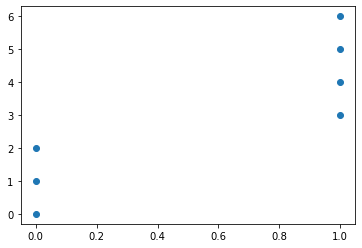

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

### 2.1

A toy dataset of Dutch cities featuring the number of pubs and churches. This small data is perfect to practice some statistical concepts. The objective of this task is to calculate and interpret the covariance and correlation coefficient.

|Dutch City   | Number of Pubs  | Number of Churches  |
|:---:|:---:|:---:|
|  Leiden | 23  |16  |
|  Maastricht |  25 |26 |
|  Haarlem |17  |12  |
|  Nijmegen |  38 |32 |
|  Eindhoven | 40  |35  |
|  Tilburg |  30 |26 |
|  Groningen |  36 |36 |
|  Den Bosch |  29 |32 |
|  Scheveningen | 15  |8  |
|  Venlo | 11  |14  |


#### 2.1.1: Use the above data to: compute the i) Covariance and ii) Correlation between the two variables (the number of pubs and the number of churches)


You can use `np.cov()` from the `numpy` library to compute the covariance.

⚠️ **Note:** The Covariance is the value that appears twice, - (the second and third number from left to right); This is because Python is actually calculating the covariance matrix, $cov(x)$, $cov(x,y)$, $cov(y,x)$, and $cov(y)$ in that order, we only need $cov(x,y)$, which happen to be the same as $cov(y,x)$



#### 2.1.2: Create a scatter plot of both variables.

## 3. Exploratory Data Analysis on a Crime Dataset from a State X

The dataset consists of observations from the year 1987 for the crime rate in a particular State `X`. The State consists of counties. The dataset is available here: https://raw.githubusercontent.com/maastrichtlawtech/law3027-advanced-legal-analytics/main/data/crime_1987.csv . The data is aggregated by county. A brief description of various variables in the dataset is presented below:



county

    county identifier
year

    year = 1987
crmrte

    crimes committed per person
prbarr

    'probability' of arrest
prbconv

    'probability' of conviction
prbpris

    'probability' of prison sentence
avgsen

    average sentence, days
polpc

    police per capita
density

    hundreds of people per square mile
taxpc

    tax revenue per capita
west

    'west' = 1, if region is west for the State 
    
central

    'central' = 1, if region is central for the State

urban

    'urban' = 1 if in SMSA (Standard Metropolitan Statistical Area)
    
pctmin80

    percentage minority in 1980
    
wcon

    weekly wage in construction
wtuc

    weekly wage in trns, util, commun
wtrd

    weekly wage in whole sales and retail trade
wfir

    weekly wage in finance, insurance and real estate
wser

    weekly wage in service industry
wmfg

    weekly wage in manufacturing
wfed

    weekly wage of federal employees
wsta

    weekly wage of state employees
wloc

    weekly wage of local governments employees
mix

    offense mix: face-to-face/other
pctymle

    percentage of young males



#### Objectives

The target (or dependent) variable of interest is crime rate which is represented by `crmrte` (in theory/future we would like to use a machine learning algorithm like <strong>Linear Regression</strong> to predict the the crime rate, `crmrte`. Your goal is to find out which are the key variables (features) with most strong association with `crmrte`. This is called as feature selection phase in machine learning. You want to take only the most relevant features to predict the value of `crmrte`. Therefore, you must


- Do an exploratory numerical and visual data analysis on the data variables
- Explore and plot the relationships between various independent variables and the target variable: `crmrte`

In [6]:
# Import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)# Set no limit to display pandas rows and columns
pd.set_option('display.max_rows', None)

#### 3.1 Read the crime dataset for the year 1987

#### 3.2 Inspect the data

In the Legal Analytics course, you learned and performed  Numerical (Exploratory) and Visual Data Analaysis. In this tutorial, you will use that knowledge to explore the given Crime dataset. Use the `info()` function to check the datatypes and get a concise summary of the DataFrame.

#### 3.3 Numerical EDA

Use the `describe()` function to get the summary statistics for the DataFrame. 

#### 3.4 Fix the data anomalies
From the analysis of the `info()` and `describe()` function did you notice any anomalies in the dataset ? If so, please take approproate measures to fix these data anomalies.

#### 3.5 Univariate Visual Exploratory Data Analysis

Conduct a univariate visual exploratory data analysis for the different columns (variables) in the crime dataset (you can plot the histograms, cumulative/probability distribution plots etc (feel free to recall the tutorial on Visual Exploratory Analysis from Legal Analytics Course).

What are your observations. Did you find some outliers? If so, you may decide to drop those particular rows from the dataset

#### 3.6 Correlation Analysis

The target variable of interest is crime rate which is represented by `crmrte` in the `data_crime` DataFrame. Therefore, we are interested in computing the correlation coefficient between `crmrte` and other variables in the dataset.

Follow the tutorial here: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html and 

- a) plot the relationship between `crmrte` and all the other independent variables in the dataset. 
- b) Compute the correlation matrix between all the variables of the `data_crime` DataFrame. Before doing this, drop the column `year` as its a constant.
- c) Plot a heatmap of this correlation matrix using the `seaborn` library
- d) Identify the top 5 most correlated variables (features) with `crmrte` 
- e) Plot a heatmap matrix of `crmrte` with the 5 most correlated variables (features)